In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [100]:
import itertools
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score , confusion_matrix


In [101]:
path = '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/'


data = {"imgpath": [] , "labels": [] }

category = os.listdir(path)
for folder in category:
    folderpath = os.path.join(path , folder)
    filelist = os.listdir(folderpath)
    for file in filelist:
        fpath = os.path.join(folderpath, file)
        data["imgpath"].append(fpath)
        data["labels"].append(folder)
      

df = pd.DataFrame(data) 


In [122]:
df.head()

,imgpath,labels
0,/kaggle/input/animal-image-dataset-90-differen...,beetle
1,/kaggle/input/animal-image-dataset-90-differen...,beetle
2,/kaggle/input/animal-image-dataset-90-differen...,beetle
3,/kaggle/input/animal-image-dataset-90-differen...,beetle
4,/kaggle/input/animal-image-dataset-90-differen...,beetle


In [103]:
df.labels.value_counts()

labels
beetle          60
duck            60
reindeer        60
wombat          60
ox              60
                ..
hippopotamus    60
donkey          60
pigeon          60
dog             60
boar            60
Name: count, Length: 90, dtype: int64

In [104]:
sample_df=df.sample(n=10)
sample_df

,imgpath,labels
3223,/kaggle/input/animal-image-dataset-90-differen...,possum
1320,/kaggle/input/animal-image-dataset-90-differen...,otter
3850,/kaggle/input/animal-image-dataset-90-differen...,wombat
4575,/kaggle/input/animal-image-dataset-90-differen...,okapi
977,/kaggle/input/animal-image-dataset-90-differen...,butterfly
4346,/kaggle/input/animal-image-dataset-90-differen...,crab
3825,/kaggle/input/animal-image-dataset-90-differen...,ox
263,/kaggle/input/animal-image-dataset-90-differen...,hedgehog
748,/kaggle/input/animal-image-dataset-90-differen...,eagle
2006,/kaggle/input/animal-image-dataset-90-differen...,pig


In [ ]:
plt.figure(figsize=(15,12))
for i, row in sample_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [119]:
!conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Channels:
 - pytorch
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
 - file:///tmp/conda
Platform: linux-64

UnavailableInvalidChannel: HTTP 404 UNAVAILABLE OR INVALID for channel conda <file:///tmp/conda>

The channel is not accessible or is invalid.

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.

As of conda 4.3, a valid channel must contain a `noarch/repodata.json` and
associated `noarch/repodata.json.bz2` file, even if `noarch/repodata.json` is
empty. Use `conda index /tmp/conda`, or create `noarch/repodata.json`
and associated `noarch/repodata.json.bz2`.


  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-8mnvp_er
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-8mnvp_er
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c

input image is 


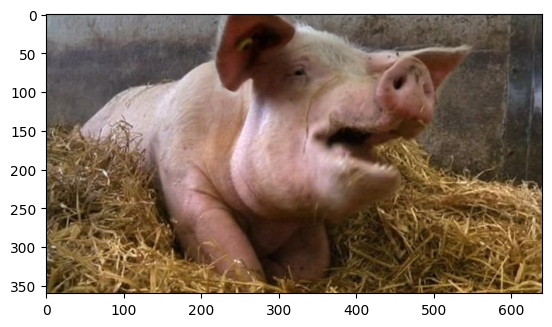

animal labels are ['possum' 'otter' 'wombat' 'okapi' 'butterfly' 'crab' 'ox' 'hedgehog'
 'eagle' 'pig']

Top prediction: pig


In [118]:
import os
import clip
import torch
from PIL import Image
import pandas as pd

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)

row_index = 9
image_path = sample_df['imgpath'].iloc[row_index]
print('input image is ')
plt.imshow(Image.open(image_))
plt.show()
label = sample_df['labels'].unique()
print(f'animal labels are',label)

# Preprocess the image
image_input = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
text_input = torch.cat([clip.tokenize(f"a photo of a {c}") for c in label]).to(device)

# Calculate image features
with torch.no_grad():
    image_features = model.encode_image(image_input)

# Get labels and calculate text features
    text_features = model.encode_text(text_input)

# Calculate similarity
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

# Get the most similar label
_, index = similarity[0].topk(1)
predicted_label = label[index.item()]

print(f"\nTop prediction: {predicted_label}")
